In [5]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import NN

In [6]:
cnv=pd.read_table('cnv_data.txt')
drug=pd.read_table('drug_data.txt')
exp=pd.read_table('exp_data.txt')

In [7]:
# Dim of datasets
print(cnv.shape)
print(drug.shape)
print(exp.shape)

(47, 16825)
(47, 17)
(47, 17440)


In [8]:
cnv.head()

,RNF14,UBE2Q1,RNF17,RNF10,C6ORF120,RNF13,REM1,REM2,UCHL5,UBE2Q2,...,FOCAD,TULP2,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,OR1E3
184B5,-0.27531,-0.08965,-0.04328,-0.08252,0.18183,0.19104,-0.48543,-0.07282,-0.09747,-0.54932,...,0.11922,-1.39592,0.12332,-0.23565,-0.16667,0.09285,0.07422,-0.06533,0.26042,0.14006
600MPE,-0.10150,0.13253,0.16896,0.13698,0.46572,0.40673,-0.30348,0.13533,0.09055,-0.39866,...,0.21623,-1.63448,0.18496,-0.02530,0.02675,0.34817,0.34787,0.02979,0.41439,0.30710
AU565,-0.43808,-0.56518,0.50408,0.48355,-0.24401,0.05770,-1.15867,0.51258,-0.46957,3.00626,...,-0.37692,1.01040,-0.53263,2.19995,-0.88234,-0.29014,-0.33626,0.26201,-0.18898,0.66564
BT20,0.91651,-0.89260,0.61206,0.59522,-0.52791,-0.36584,0.36066,-0.77530,-0.79468,-1.42315,...,2.23129,1.24205,0.92896,-0.99585,2.00935,-0.47738,-0.53693,0.51660,1.18836,-0.64220
BT474,0.14679,0.61196,0.40727,0.38343,-0.70771,-0.21289,0.67909,0.39550,0.97577,0.29437,...,0.27998,-0.18930,-0.57666,0.44336,1.07124,-0.67313,-0.74673,0.98942,-0.14737,-0.58923


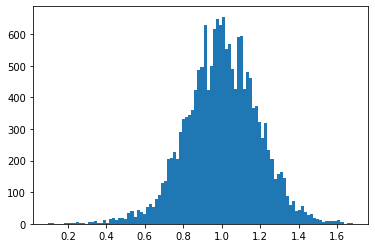

In [10]:
variation = cnv.var(axis=0) # Get the variation of all CNV

plt.hist(variation, bins = 100)
plt.show()

In [11]:
variation_filtered = variation[variation > 1.4]
len(variation_filtered)

286

In [12]:
i = variation_filtered.index
print(i)

Index(['FBXL19', 'COL4A3', 'SLC36A3', 'ATP1A1', 'SIDT2', 'SIX6', 'CNPY2',
       'RTBDN', 'GGCX', 'PRKAR2B',
       ...
       'ALDOB', 'SMARCAL1', 'TGFA', 'ACAP3', 'SMIM2', 'ETV2', 'IKZF1', 'ELF3',
       'ELF5', 'CAND2'],
      dtype='object', length=286)


In [14]:
input = cnv[i].T
input.shape

(286, 47)

In [25]:
drug_final = drug.T
print('Max value needed for output')
print(max(drug_final.max(axis=1))) # get the minimum and max numbers fo reach drug
print('Min value need for the output')
print(min(drug_final.min(axis=1))) # Get the minimum and max numbers for each drug


Max value needed for output
3.3579443062
Min value need for the output
-3.38118016504


(17, 47)

In [75]:
drug_final

,184B5,600MPE,AU565,BT20,BT474,BT483,BT549,CAMA1,HCC1143,HCC1187,...,SUM149PT,SUM159PT,SUM185PE,SUM225CWN,SUM229PE,SUM52PE,T47D,UACC812,ZR751,ZR75B
AG1478,NaN,-0.581619,0.121421,NaN,1.548178,-0.922800,-0.354165,-0.219760,-0.922800,-0.922800,...,1.300047,0.090405,-0.922800,NaN,-0.922800,-0.922800,0.069727,NaN,-0.922800,-0.922800
AZD6244,2.095471,1.382129,-0.714666,-0.714666,-0.714666,-0.714666,-0.714666,-0.714666,-0.714666,-0.714666,...,1.468594,1.836074,-0.714666,-0.714666,2.344060,0.052718,-0.714666,-0.714666,-0.228296,-0.714666
Erlotinib,2.095098,-0.836124,0.078069,1.195416,0.150624,-0.139596,-0.705525,-1.010256,-0.923190,0.353778,...,1.195416,0.078069,-1.010256,0.020025,0.107091,0.150624,-1.010256,0.049047,-1.010256,-1.010256
Fascaplysin,-0.487919,-0.438927,0.540910,-0.536911,0.002000,1.104317,-1.100318,-0.291952,-0.414431,2.696554,...,-0.806367,-0.879854,1.300285,1.275789,-0.536911,0.026496,-0.953342,NaN,-0.683887,-0.830863
GSK2126458,0.337460,0.322968,0.149062,-0.285703,0.525859,1.366404,-0.981326,-1.329138,-0.821913,0.438906,...,-0.517577,-0.532069,NaN,1.149022,0.859178,0.670780,0.656288,0.714257,0.134570,0.453398
GSK650394,2.743283,-0.655482,-0.085857,-0.085857,-0.655482,-0.085857,-0.085857,-0.655482,-0.655482,NaN,...,-0.655482,-0.085857,0.502756,NaN,2.420495,-0.085857,-0.085857,-0.655482,-0.655482,-0.655482
Lapatinib,0.143126,-0.646260,2.133753,-0.646260,2.133753,-0.646260,-0.646260,-0.646260,-0.646260,-0.646260,...,NaN,-0.646260,-0.646260,1.721899,-0.508975,-0.646260,-0.646260,2.030789,-0.646260,-0.646260
PF-4691502,-0.377874,0.752584,1.073162,-2.419447,0.060811,NaN,-0.833432,-0.226021,-0.023551,1.916787,...,0.347644,-0.242894,-0.175404,-0.141659,-1.052774,0.651349,0.668222,1.461229,1.258759,0.685094
Pemetrexed,2.018212,-0.567035,-0.567035,-0.567035,-0.567035,-0.567035,-0.567035,0.814849,-0.567035,-0.567035,...,-0.567035,-0.567035,-0.567035,-0.567035,0.755342,-0.567035,-0.567035,-0.567035,1.099160,-0.567035
Rapamycin,-1.563940,-1.114066,0.643254,0.326936,0.643254,1.458650,-0.966451,0.783839,-0.305699,0.755722,...,-1.177329,0.446434,-0.467372,0.889279,-1.296827,1.275889,-0.242435,0.439405,NaN,NaN


In [110]:
temp = drug_final.loc[drug_final.index[0:14]]
# temp = temp.loc[temp.index[-13]]
temp=temp.drop(labels='drug3')
temp.isnull().any(axis=0)
bolean=temp.isnull().any(axis=0)
remove = known_drugs.columns[bolean]
remove
Final_output=temp[temp.columns.drop(labels=remove)] # remove col lines with nan
print(Final_output.shape)
Final_output

(13, 18)


,AU565,BT549,CAMA1,HCC1395,HCC1428,HCC1806,HCC1954,HCC2185,HCC3153,HCC70,MCF10F,MCF7,MDAMB134VI,MDAMB175VII,MDAMB415,MDAMB453,SUM1315MO2,SUM159PT
AG1478,0.121421,-0.354165,-0.219760,-0.540263,-0.922800,-0.044000,1.000221,-0.106033,-0.922800,-0.478231,2.085797,-0.643652,-0.364504,1.455129,-0.922800,-0.922800,1.455129,0.090405
AZD6244,-0.714666,-0.714666,-0.714666,-0.584967,-0.714666,-0.714666,0.949800,-0.714666,-0.714666,0.852526,0.712019,-0.714666,1.338896,0.679594,-0.001323,-0.714666,0.657978,1.836074
Erlotinib,0.078069,-0.705525,-1.010256,-0.502371,-0.183129,0.716553,0.977751,-0.241173,-0.531393,1.282482,2.414340,-1.010256,-1.010256,0.934218,-1.010256,-0.154107,0.223179,0.078069
Fascaplysin,0.540910,-1.100318,-0.291952,-0.585903,1.716716,-0.340944,-0.389935,0.418431,-0.438927,0.418431,-0.340944,-0.022496,-0.193968,-0.120480,1.202301,0.810366,-0.855358,-0.879854
GSK2126458,0.149062,-0.981326,-1.329138,-0.995819,-0.619022,-0.662499,0.062109,0.062109,-0.894374,0.192539,0.975116,0.207031,-0.039336,1.062069,-3.097182,0.482382,0.033125,-0.532069
GSK650394,-0.085857,-0.085857,-0.655482,-0.655482,-0.655482,-0.655482,-0.085857,-0.655482,-0.085857,-0.655482,0.123006,-0.085857,-0.655482,-0.655482,-0.085857,-0.655482,2.990121,-0.085857
Lapatinib,2.133753,-0.646260,-0.646260,-0.646260,-0.646260,-0.646260,0.726586,-0.646260,-0.646260,0.417696,-0.371691,-0.646260,-0.646260,1.515972,-0.646260,0.228929,-0.577618,-0.646260
PF-4691502,1.073162,-0.833432,-0.226021,0.246409,-0.614089,-0.749069,0.010194,0.415134,-3.381180,0.735712,-0.124786,0.870692,-0.124786,0.600732,0.347644,0.010194,0.313899,-0.242894
Pemetrexed,-0.567035,-0.567035,0.814849,-0.567035,-0.567035,1.760348,-0.567035,-0.567035,-0.567035,-0.567035,-0.567035,-0.567035,-0.567035,3.115785,-0.567035,-0.567035,-0.567035,-0.567035
Rapamycin,0.643254,-0.966451,0.783839,-1.310886,0.411288,-1.894316,1.226684,1.465679,-1.022685,0.151204,-0.889129,0.094970,2.013963,1.212625,1.395387,0.425346,-0.804778,0.446434


In [117]:
# Can only have outputs between -1 and 1
scaled_final_output=Final_output/10
print('Max value needed for output')
print(max(scaled_final_output.max(axis=1))) # get the minimum and max numbers fo reach drug
print('Min value need for the output')
print(min(scaled_final_output.min(axis=1))) # Get the minimum and max numbers for each drug

Max value needed for output
0.311578483184
Min value need for the output
-0.338118016504


In [112]:
Final_input=input[input.columns.drop(labels=remove)] # remove unwante celllines from training
Final_input.shape

(286, 18)

In [113]:
x= Final_input # The CNV info for each drug
y= Final_output # GI50 data for 13 drugs
NN = NN.dlnet(x, y, lr=3, d1=286, h=50, d2=13) # 286 neurons for each CNV, 50 hidden neurons, 13 output neurons

In [114]:
NN.gd(x, y)

NameError: name 'Sigmoid' is not defined